## Obtenção dos picos do Uv-Vis

### Importações

In [1]:
import numpy as np
import pandas as pd
from os import listdir
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

### Obtenção picos

In [2]:
files = listdir('dados/v1')

In [283]:
def encontrar_picos(file):
    dado = pd.read_csv(f'dados/v1/{file}', header=40, encoding = "ISO-8859-1")
    if dado.columns[0] == 'Print:':
        dado = pd.read_csv(f'dados/v1/{file}', header=41, encoding = "ISO-8859-1")
    
    peak_indices, _ = find_peaks(dado['Absorbance'], height=.1, distance=40)

    print('Índices:', end=' ')
    print(peak_indices)
        
    if len(peak_indices)>0:
        
        if len(peak_indices) == 1:
            
            pp = dado['Wavelength (nm)'][peak_indices[0]]
            sp,tp = np.nan,np.nan
            
        elif len(peak_indices) == 2:
            
            pp,sp = dado['Wavelength (nm)'][peak_indices[1]],dado['Wavelength (nm)'][peak_indices[0]]
            tp = np.nan
        
        else:
            
            pp,sp,tp = dado['Wavelength (nm)'][peak_indices[1]],dado['Wavelength (nm)'][peak_indices[2]],dado['Wavelength (nm)'][peak_indices[0]]
    
    else:
        pp,sp,tp = np.nan,np.nan,np.nan        
    
    print(f'{pp},{sp},{tp}')
    
    plt.plot(np.array(dado['Wavelength (nm)']), np.array(dado['Absorbance']))
    plt.plot(np.array(dado['Wavelength (nm)'])[peak_indices], np.array(dado['Absorbance'])[peak_indices], "x")
    plt.title(file[:-4])
    plt.show()
        
    f = file.replace('.txt','')
    
    return pp, sp, tp, f

In [24]:
i = 0

primeiro_pico = []
segundo_pico = []
terceiro_pico = []
amostra = []

Índices: [23]
223.0,nan,nan


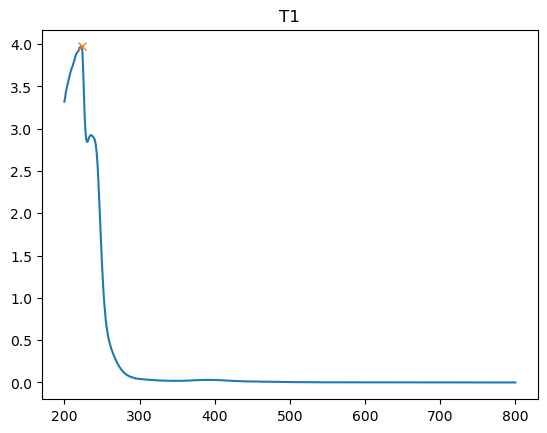

In [311]:
pp,sp,tp,f = encontrar_picos(files[0])

In [285]:
primeiro_pico.append(pp)
segundo_pico.append(sp)
terceiro_pico.append(tp)
amostra.append(f)

In [286]:
print(f'pp {primeiro_pico}\nsp {segundo_pico}\ntp {terceiro_pico}\nf {amostra}')

pp [235.0, nan, 545.0, nan, 752.0, 687.0, 751.0, 535.0, 235.0, 717.0, 523.0, 789.0, 795.0, 525.0, 802.0, 236.0, 779.0, 223.0, 763.0, 645.0, 752.0, nan, 579.0, 239.0, 225.0, 711.0, 761.0, nan, 598.0, 745.0, 646.0]
sp [223.0, nan, 756.0, nan, 525.0, 524.0, 552.0, 740.0, 224.0, 524.0, nan, 527.0, 525.0, 229.0, 524.0, 223.0, 526.0, 225.0, 525.0, 522.0, 524.0, nan, 703.0, 223.0, nan, 544.0, 528.0, nan, 712.0, 563.0, 523.0]
tp [nan, nan, 239.0, nan, nan, nan, nan, 239.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, 220.0, nan, nan, nan, nan, 518.0, nan, nan, nan, nan, nan, 518.0, nan, nan]
f ['T1', 'H1', 'AC 3', 'TA1', 'TS3', 'TA3', 'S3', 'AC 2', 'C1', 'TP1', 'TA2', 'TP4', 'TS5', 'AC 1', 'TS4', 'T2', 'TP5', 'C3', 'TP3', 'H5', 'TP2', 'H3', 'S4', 'T3', 'C2', 'H4', 'TS2', 'H2', 'S1', 'S2', 'TA4']


In [287]:
i += 1

### Tratamento dos picos

In [291]:
primeiro_pico = [235.0,np.nan,756.0,np.nan,752.0,687.0,751.0,740.0,235.0,717.0,523.0,789.0,795.0,525.0,802.0,236.0,779.0,225.0,763.0,645.0,752.0,np.nan,703.0,239.0,225.0,711.0,761.0,np.nan,712.0,745.0,646.0]
segundo_pico = [223.0,np.nan,545.0,np.nan,525.0,524.0,552.0,535.0,224.0,524.0,np.nan,527.0,525.0,229.0,524.0,223.0,526.0,223.0,525.0,522.0,524.0,np.nan,579.0,223.0,np.nan,544.0,528.0,np.nan,598.0,563.0,523.0]
terceiro_pico = [np.nan,np.nan,239.0,np.nan,np.nan,np.nan,np.nan,239.0,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,220.0,np.nan,np.nan,np.nan,np.nan,518.0,np.nan,np.nan,np.nan,np.nan,np.nan,518.0,np.nan,np.nan]

In [292]:
dic = {'Amostra': amostra, 'Primeiro Pico': primeiro_pico, 'Segundo Pico': segundo_pico, 'Terceiro Pico': terceiro_pico}

In [293]:
with open('dados tratados/v1/raw_data_v1.txt', 'w') as f:
    print(dic, file=f)

In [294]:
df = pd.DataFrame(dic)

In [306]:
abs_pp, abs_sp, abs_tp = [], [], []

for amostra, pp, sp, tp in zip(df['Amostra'], df['Primeiro Pico'], df['Segundo Pico'], df['Terceiro Pico']):
    
    dado = pd.read_csv(f'dados/v1/{amostra}.txt', header=40, encoding = "ISO-8859-1")
    
    if dado.columns[0] == 'Print:':
        dado = pd.read_csv(f'dados/v1/{amostra}.txt', header=41, encoding = "ISO-8859-1")
    
    wavelength, absorbance = list(dado['Wavelength (nm)']), list(dado['Absorbance'])
    
    index_pp, index_sp, index_tp = [], [], []
        
    if not np.isnan(pp): index_pp = (wavelength.index(pp))
    else: index_pp = (np.nan)
        
    if not np.isnan(sp): index_sp = (wavelength.index(sp))
    else: index_sp = (np.nan)
        
    if not np.isnan(tp): index_tp = (wavelength.index(tp))
    else: index_tp = (np.nan)
        
    if not np.isnan(index_pp): abs_pp.append(absorbance[index_pp])
    else: abs_pp.append(np.nan)
    
    if not np.isnan(index_sp): abs_sp.append(absorbance[index_sp])
    else: abs_sp.append(np.nan)
    
    if not np.isnan(index_tp): abs_tp.append(absorbance[index_tp])
    else: abs_tp.append(np.nan)
    
df['Abs 1º Pico'] = abs_pp
df['Abs 2º Pico'] = abs_sp
df['Abs 3º Pico'] = abs_tp

In [309]:
df = df.rename(columns={'Primeiro Pico': 'WL 1º Pico', 'Segundo Pico': 'WL 2º Pico', 'Terceiro Pico': 'WL 3º Pico'})

In [315]:
df.to_csv('targets.csv', index=False)

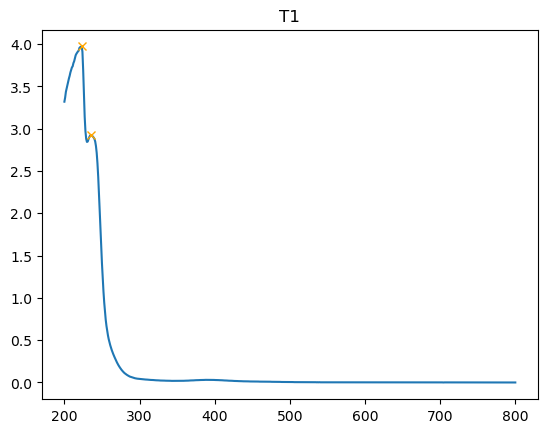

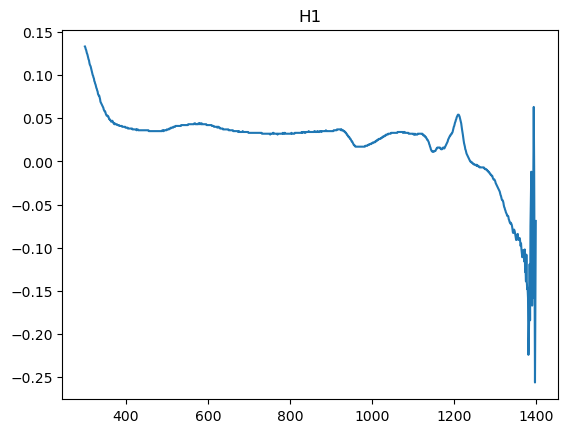

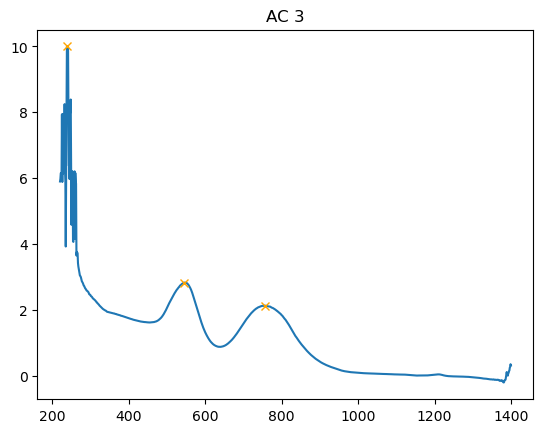

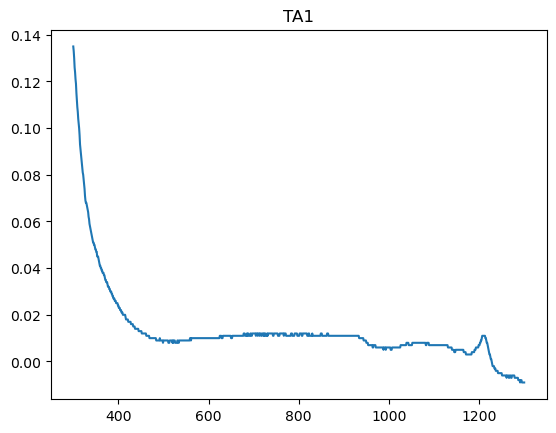

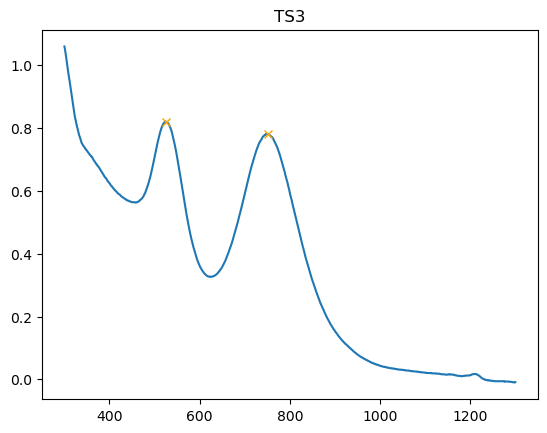

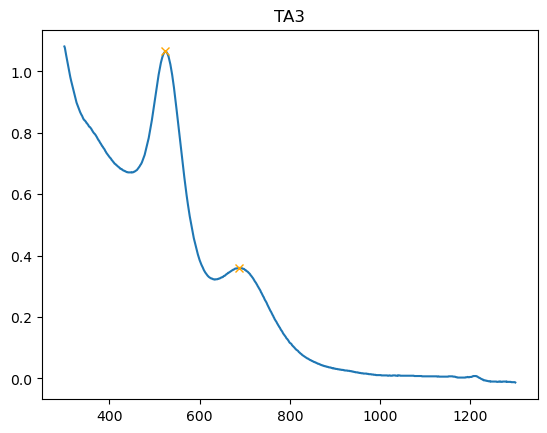

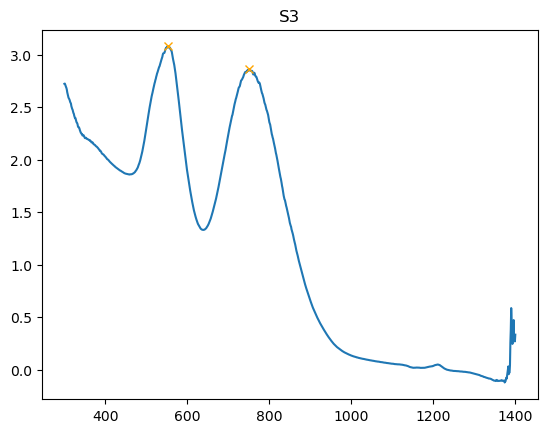

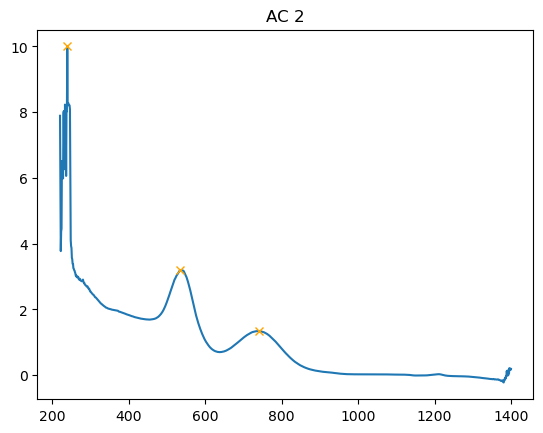

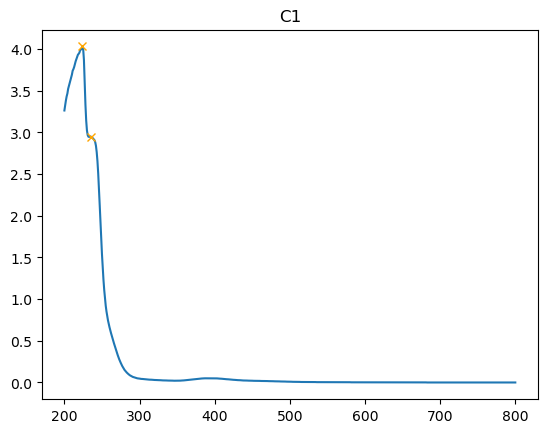

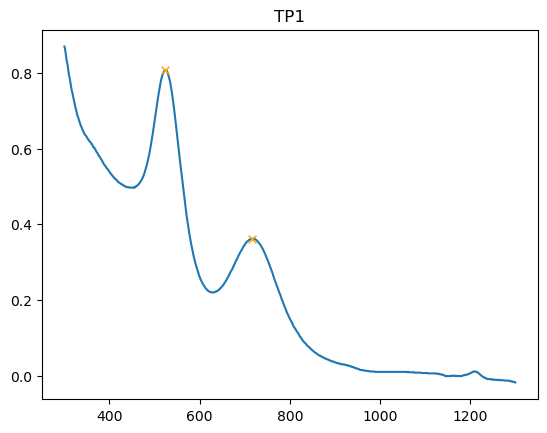

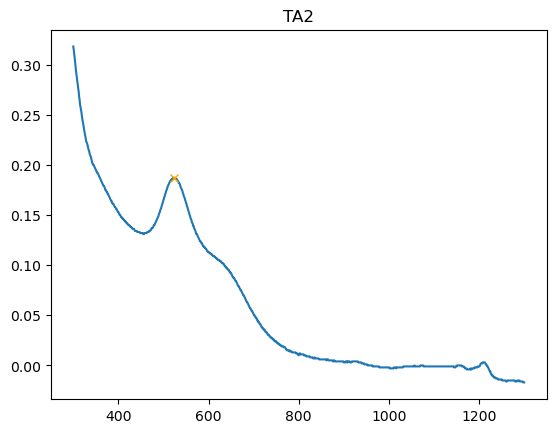

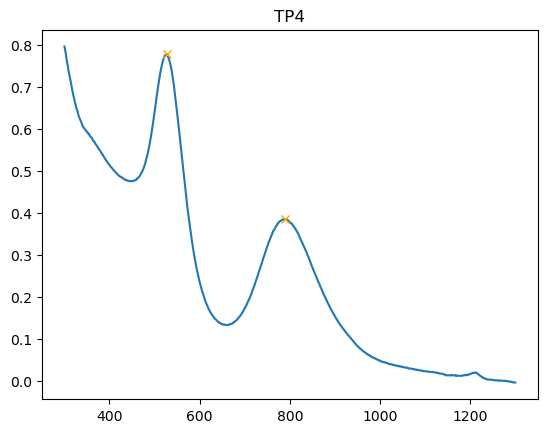

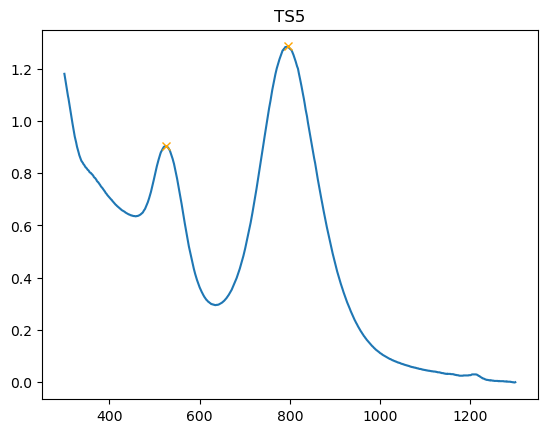

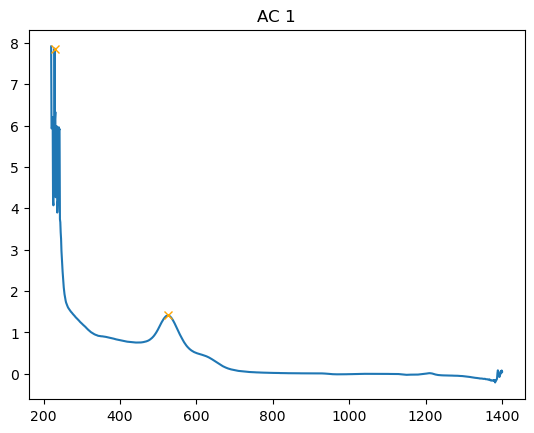

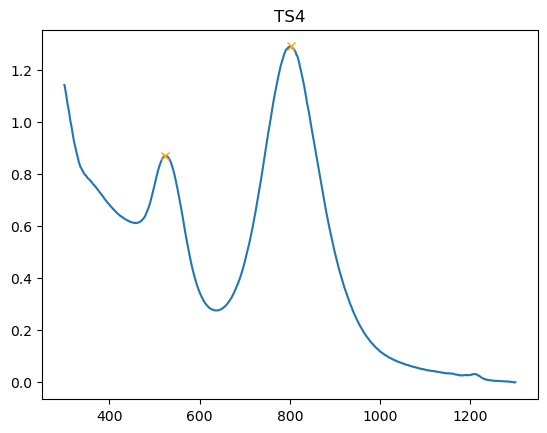

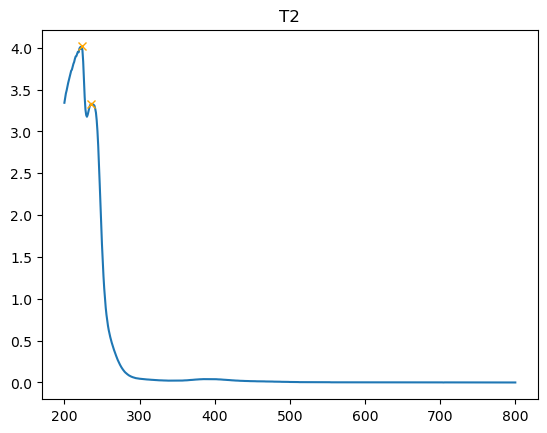

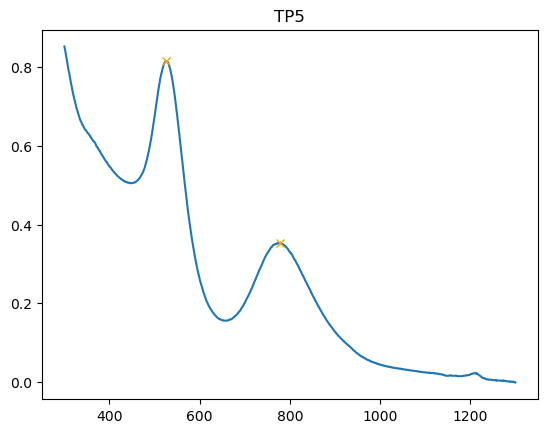

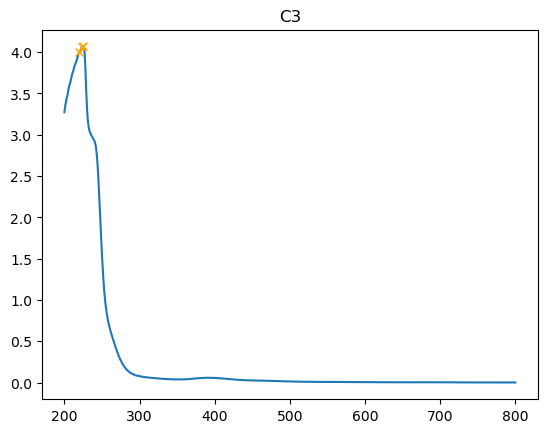

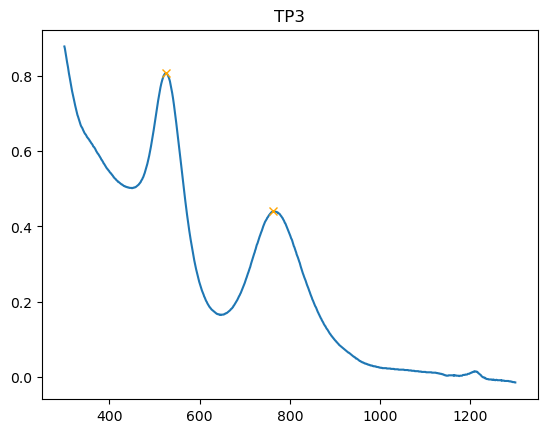

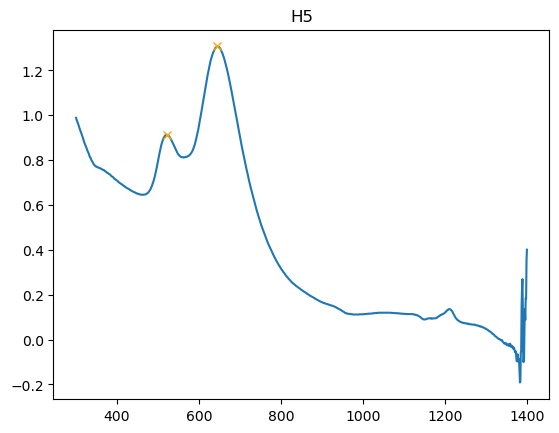

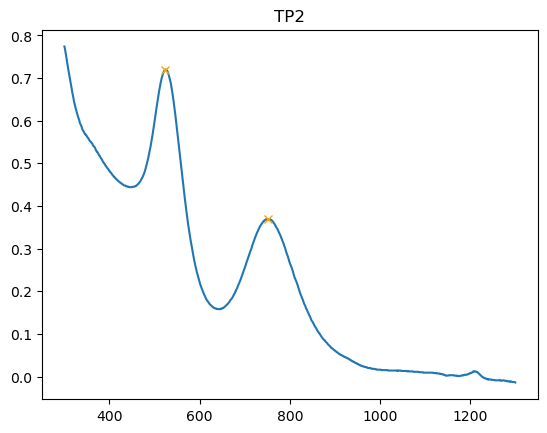

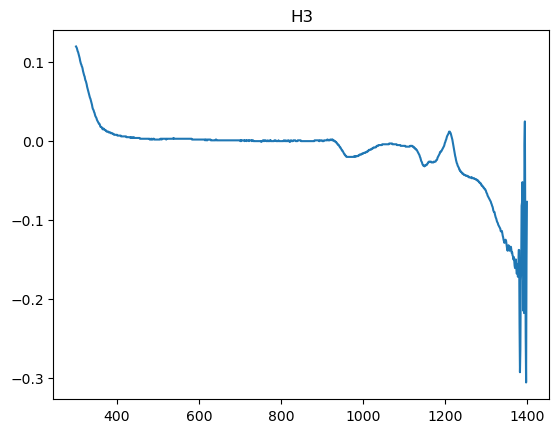

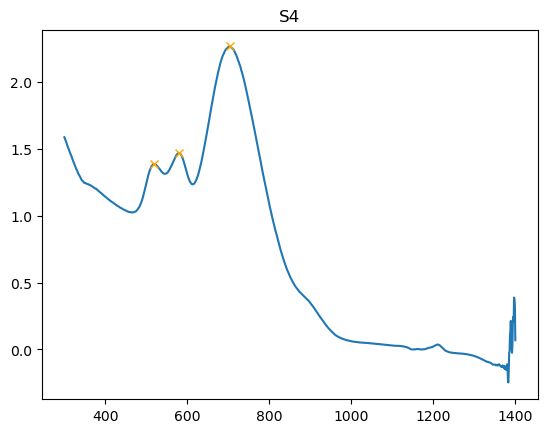

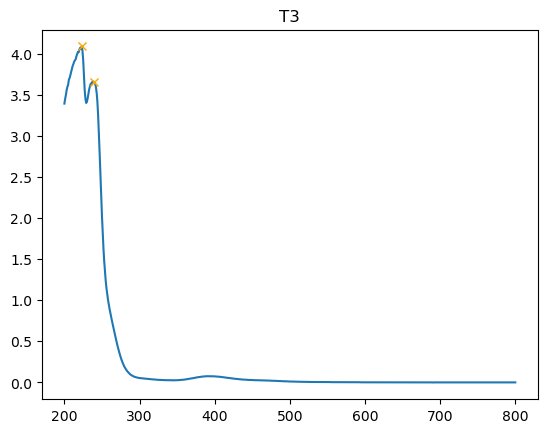

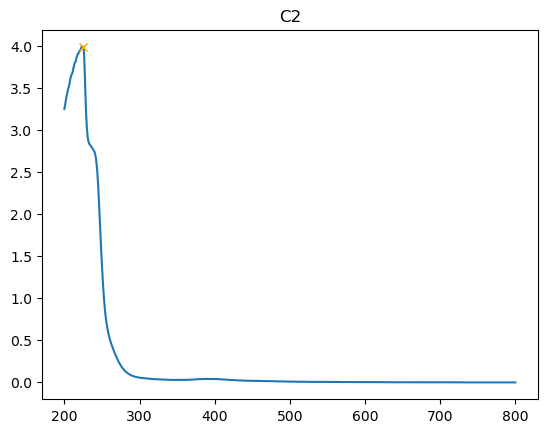

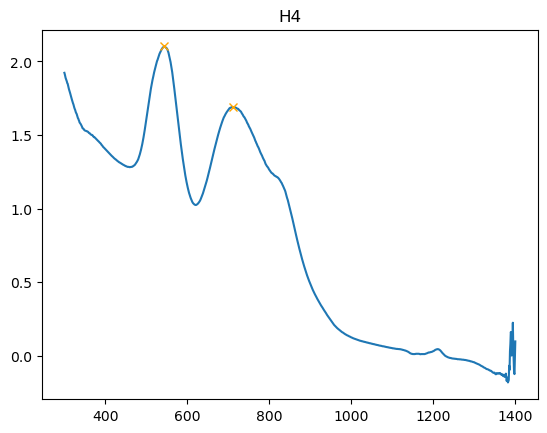

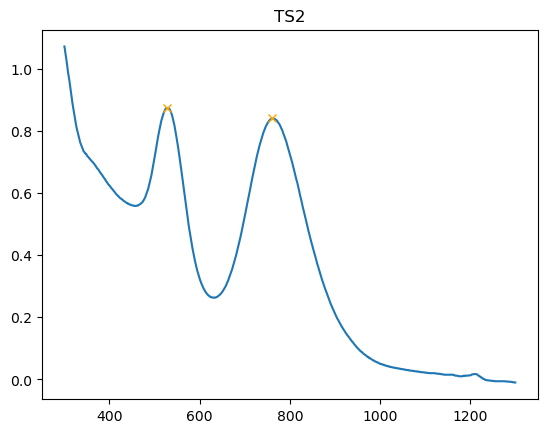

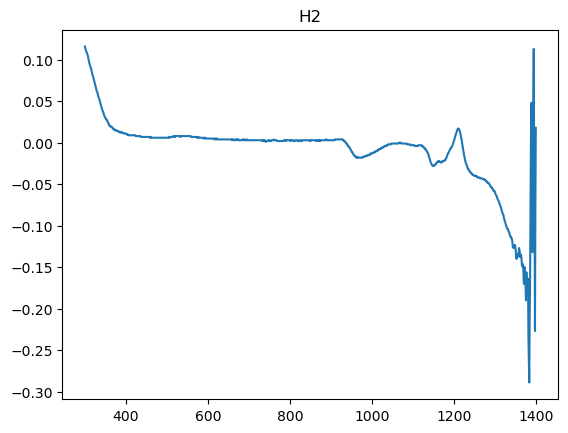

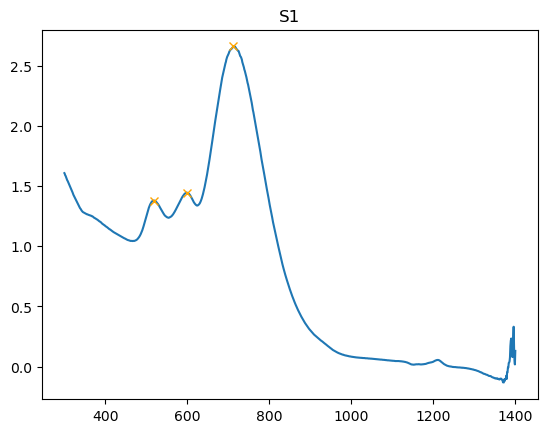

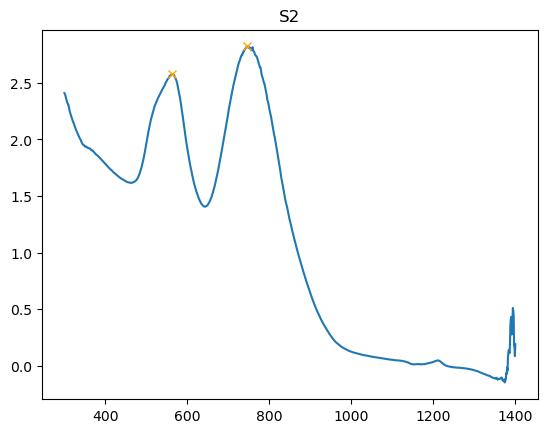

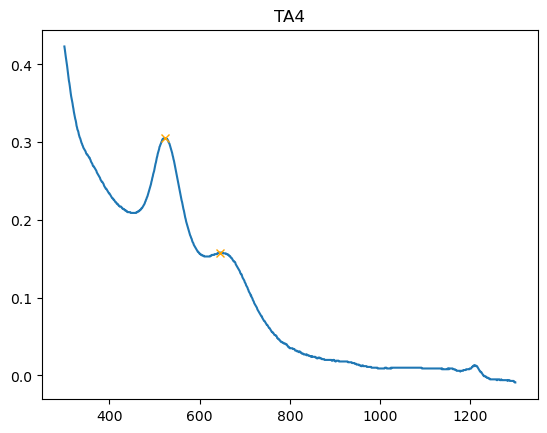

In [316]:
for amostra, wv_pp, wv_sp, wv_tp, abs_pp, abs_sp, abs_tp in zip(df['Amostra'], df['WL 1º Pico'], df['WL 2º Pico'], df['WL 3º Pico'], df['Abs 1º Pico'], df['Abs 2º Pico'], df['Abs 3º Pico']):
    
    dado = pd.read_csv(f'dados/v1/{amostra}.txt', header=40, encoding = "ISO-8859-1")
    if dado.columns[0] == 'Print:':
        dado = pd.read_csv(f'dados/v1/{amostra}.txt', header=41, encoding = "ISO-8859-1")
        
    plt.plot(np.array(dado['Wavelength (nm)']), np.array(dado['Absorbance']))
    
    plt.plot(wv_pp, abs_pp, "x", color='orange')
    plt.plot(wv_sp, abs_sp, "x", color='orange')
    plt.plot(wv_tp, abs_tp, "x", color='orange')
    
    # plt.plot(np.array(dado['Wavelength (nm)'])[wv_pp], np.array(dado['Absorbance'])[abs_pp], "x")
    # plt.plot(np.array(dado['Wavelength (nm)'])[wv_sp], np.array(dado['Absorbance'])[abs_sp], "x")
    
    plt.title(amostra)
    plt.show()